In [1]:
import warnings;
warnings.filterwarnings('ignore');
import os
os.environ["DISABLE_MPI"]="1"
os.environ["OMP_NUM_THREADS"]="3"

In [53]:
!echo $PYTHONPATH

/opt/ovis/lib/python2.7/site-packages


In [52]:
import numpy as np
from pixell import enmap, utils, enplot, colorize, reproject
import glob as gl
import pylab as plt
import healpy as hp
from '/global/u2/a/aiola/repos/cmb_footprint' import footprint

SyntaxError: invalid syntax (<ipython-input-52-8226067793e6>, line 6)

In [21]:
release_path = '/global/cfs/projectdirs/act/data/20191125_actpol_dr4/'

In [28]:
paths = gl.glob(release_path+'/maps/s16/*f150*coadd*ivar*')

for i, path in enumerate(paths):
    print(path)
    ivar = enmap.downgrade(enmap.read_map(path),10)
    if i==0:
        mask = ivar*1.
    else:
        mask += ivar

/global/cfs/projectdirs/act/data/20191125_actpol_dr4//maps/s16/act_dr4_s16_AA_pa3_f150_nohwp_night_3pass_2way_coadd_ivar.fits
/global/cfs/projectdirs/act/data/20191125_actpol_dr4//maps/s16/act_dr4_s16_AA_pa2_f150_nohwp_night_3pass_2way_coadd_ivar.fits


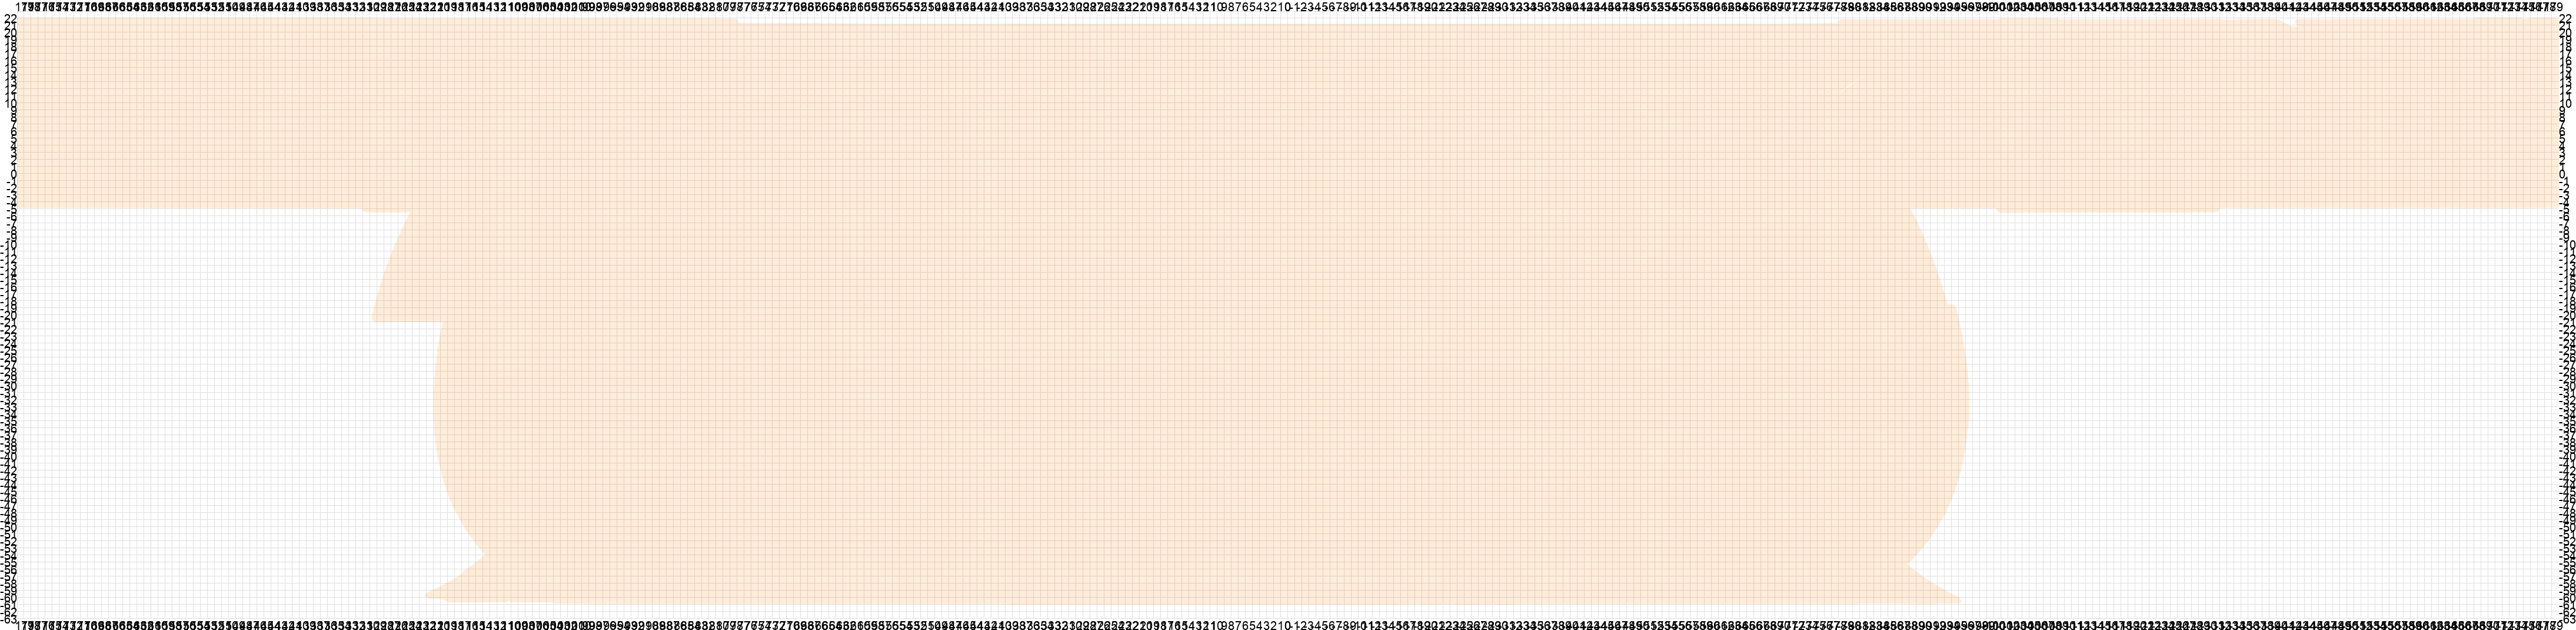

In [30]:
mask[mask!=0] = 1.
pl = enplot.plot(mask,mask=0)
enplot.show(pl)

In [41]:
maskhp = mask.to_healpix(nside=hp.get_nside(pl353), order=0)

In [6]:
pl353 = hp.read_map('HFI_SkyMap_353_2048_R2.02_full.fits')

NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


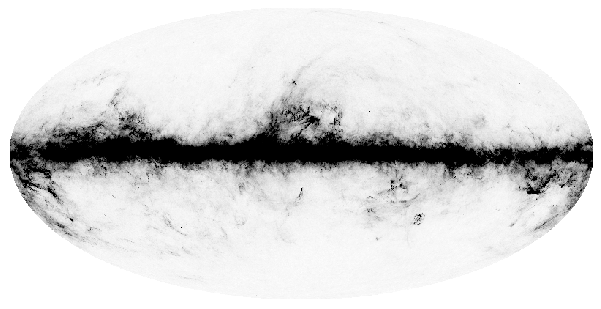

In [49]:
a = hp.mollview(pl353, min=0, max=1e-2,cbar=False,title='',cmap="Greys", return_projected_map=True)

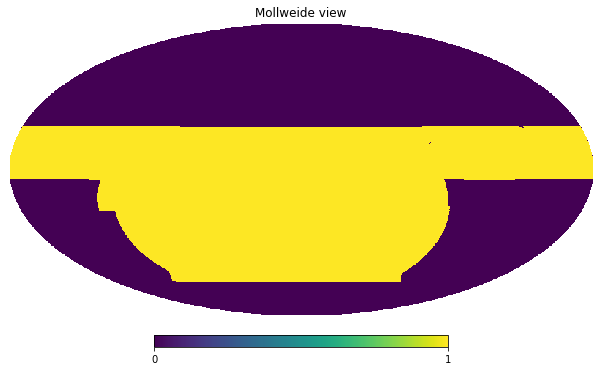

In [42]:
hp.mollview(maskhp)